In [26]:
import pandas as pd
from webconfig import tipos_comida_chart
import plotly.express as px

In [ ]:
"Potencial estrella Michelin"
"Provincia"
"Reservas_today"
"Reservas_last_week"
"Rate_Distinction"
"Numero_awards"
"Review_count"
"Rating_count"
"Food_rating"
"Service_rating"
"Ambience_rating"
"Tipo_comida"

In [37]:
data.columns

Index(['Unnamed: 0', 'Michelin', 'Slug', 'Bookable', 'Street', 'ZipCode',
       'Locality', 'Country', 'Longitude', 'Latitude', 'Cantidad_metodos_pago',
       'Reservas_today', 'Reservas_last_week', 'Rate_Distinction',
       'Numero_fotos', 'Is_Affiliated', 'Name', 'Average_Price',
       'Numero_awards', 'Review_count', 'Rating_count', 'Food_rating',
       'Service_rating', 'Ambience_rating', 'Tipo_comida', 'Provincia',
       'Poblacion', 'Salario Medio Anual'],
      dtype='object')

In [27]:
data=pd.read_csv("./data_restaurantes_final.csv", sep=";", encoding="utf-8")

In [39]:
data_raw=data[["Michelin","Provincia","Reservas_today",
"Reservas_last_week",
"Rate_Distinction",
"Numero_awards",
"Review_count",
"Rating_count",
"Food_rating",
"Service_rating",
"Ambience_rating",
"Tipo_comida","Average_Price"]]

In [42]:
import seaborn as sns

In [44]:
data_raw.corr()

,Michelin,Reservas_today,Reservas_last_week,Numero_awards,Review_count,Rating_count,Food_rating,Service_rating,Ambience_rating,Average_Price
Michelin,1.000000,0.018751,0.066525,0.605361,-0.017036,-0.017596,0.192167,0.166421,0.172832,0.591766
Reservas_today,0.018751,1.000000,0.865269,-0.000119,0.295613,0.338296,0.025683,0.002903,0.074018,0.054782
Reservas_last_week,0.066525,0.865269,1.000000,0.028885,0.365541,0.419777,0.085524,0.046824,0.132807,0.088026
Numero_awards,0.605361,-0.000119,0.028885,1.000000,-0.021922,-0.023533,0.146486,0.135440,0.134577,0.545974
Review_count,-0.017036,0.295613,0.365541,-0.021922,1.000000,0.984890,0.090183,0.071444,0.101202,0.012273
Rating_count,-0.017596,0.338296,0.419777,-0.023533,0.984890,1.000000,0.087261,0.062839,0.102053,0.006064
Food_rating,0.192167,0.025683,0.085524,0.146486,0.090183,0.087261,1.000000,0.829415,0.787455,0.217841
Service_rating,0.166421,0.002903,0.046824,0.135440,0.071444,0.062839,0.829415,1.000000,0.790370,0.198062
Ambience_rating,0.172832,0.074018,0.132807,0.134577,0.101202,0.102053,0.787455,0.790370,1.000000,0.258650
Average_Price,0.591766,0.054782,0.088026,0.545974,0.012273,0.006064,0.217841,0.198062,0.258650,1.000000


In [69]:
numeric_columns=data.select_dtypes(include=['float64', 'int64'])
numeric_columns.corr()["Average_Price"].sort_values(ascending=False).drop("Average_Price")

Numero_awards            0.545974
Ambience_rating          0.258650
Food_rating              0.217841
Service_rating           0.198062
Reservas_last_week       0.088026
Unnamed: 0               0.083090
Latitude                 0.071723
Reservas_today           0.054782
Salario Medio Anual      0.031158
Longitude                0.017798
Review_count             0.012273
Rating_count             0.006064
Numero_fotos             0.000406
ZipCode                 -0.010241
Cantidad_metodos_pago   -0.053014
Poblacion               -0.067776
Name: Average_Price, dtype: float64

In [62]:
def corr_bar(data):
    numeric_columns = data.select_dtypes(include=['float64', 'int64'])
    correlation_series = numeric_columns.corr()["Average_Price"].sort_values(ascending=False)
    
    # Creamos un DataFrame con los resultados
    correlation_df = pd.DataFrame(correlation_series, columns=["Average_Price"])
    print(correlation_df)
    # Creamos el gráfico de barras horizontales con Plotly Express
    fig = px.bar(correlation_df, x=correlation_df.index, y="Average_Price", orientation="v",
                title="Correlación con Average_Price")
    fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                    marker_line_width=1.5, opacity=0.6)
    # Mostramos el gráfico en Streamlit
    return fig

In [63]:
corr_bar(data_raw)

                    Average_Price
Average_Price            1.000000
Numero_awards            0.545974
Ambience_rating          0.258650
Food_rating              0.217841
Service_rating           0.198062
Reservas_last_week       0.088026
Reservas_today           0.054782
Review_count             0.012273
Rating_count             0.006064


In [49]:
data_raw.corr()["Average_Price"].sort_values(ascending=False)

Average_Price         1.000000
Michelin              0.591766
Numero_awards         0.545974
Ambience_rating       0.258650
Food_rating           0.217841
Service_rating        0.198062
Reservas_last_week    0.088026
Reservas_today        0.054782
Review_count          0.012273
Rating_count          0.006064
Name: Average_Price, dtype: float64

<AxesSubplot:>

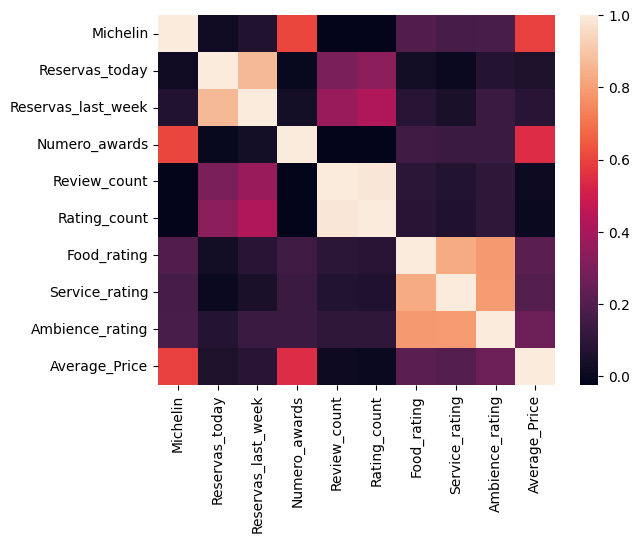

In [45]:
sns.heatmap(data_raw.corr())